# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 797kB/s]
100% 235k/235k [00:00<00:00, 796kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('Traffic Data.csv')

In [74]:
df.index = pd.to_datetime(df.index)

In [11]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
1970-01-01 00:00:00.000000000,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1970-01-01 00:00:00.000000001,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
1970-01-01 00:00:00.000000002,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
1970-01-01 00:00:00.000000003,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
1970-01-01 00:00:00.000000004,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [12]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
1970-01-01 00:00:00.000019995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
1970-01-01 00:00:00.000019996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
1970-01-01 00:00:00.000019997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
1970-01-01 00:00:00.000019998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
1970-01-01 00:00:00.000019999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [19]:
df.sample(10)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
1970-01-01 00:00:00.000009583,956.0,268.03,0.0,0.0,1,Clear,sky is clear,2016-11-20 23:00:00
1970-01-01 00:00:00.000000358,2631.0,279.95,0.0,0.0,90,Drizzle,drizzle,2017-04-02 09:00:00
1970-01-01 00:00:00.000001629,1412.0,293.29,0.0,0.0,1,Clear,sky is clear,2018-08-11 00:00:00
1970-01-01 00:00:00.000011999,2197.0,274.22,0.0,0.0,1,Clear,sky is clear,2018-02-26 21:00:00
1970-01-01 00:00:00.000013084,3707.0,288.14,0.0,0.0,90,Rain,light rain,2018-06-02 09:00:00
1970-01-01 00:00:00.000015313,5335.0,275.37,0.0,0.0,90,Rain,moderate rain,2017-04-26 08:00:00
1970-01-01 00:00:00.000019989,3961.0,271.01,0.0,0.0,75,Clouds,broken clouds,2018-04-08 11:00:00
1970-01-01 00:00:00.000000346,6083.0,289.35,0.0,0.0,90,Rain,heavy intensity rain,2018-06-06 07:00:00
1970-01-01 00:00:00.000000922,3375.0,262.00,0.0,0.0,1,Clear,sky is clear,2017-12-23 10:00:00
1970-01-01 00:00:00.000008836,4452.0,274.48,0.0,0.0,90,Mist,mist,2017-12-11 12:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000019999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


In [17]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [15]:
print(df.isna().sum())

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
date_time               0
dtype: int64


In [16]:
df.duplicated().sum()

12

In [18]:
df = df.dropna()

In [75]:
# Convert 'date_time' to datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

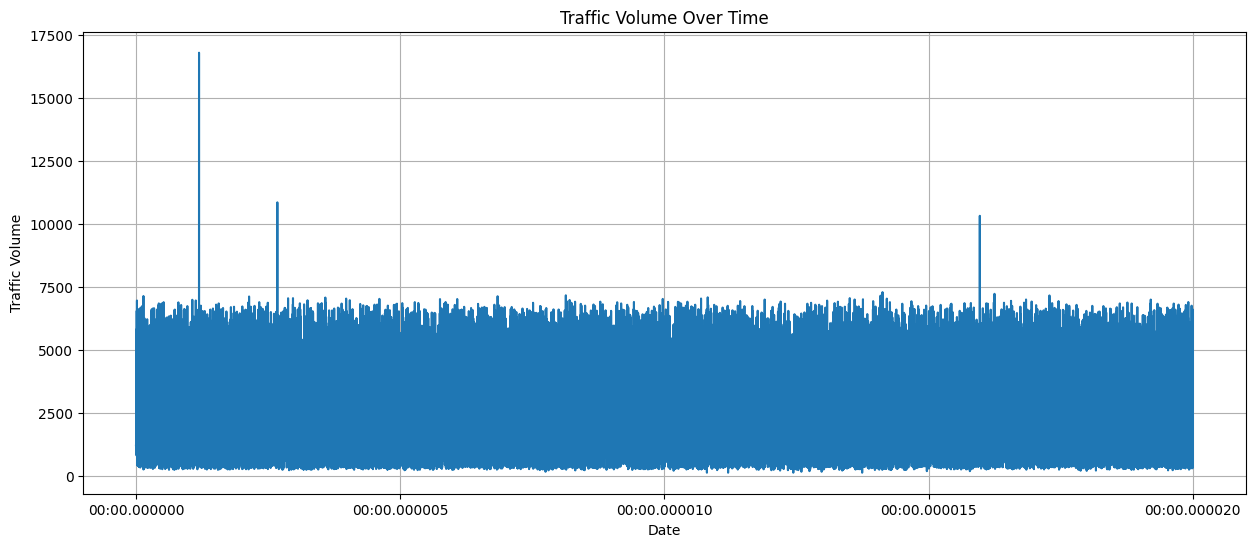

In [23]:
# Plot the time series data

import matplotlib.pyplot as plt
# Plot the time series data
plt.figure(figsize=(15, 6))
sns.lineplot(x=df.index, y='traffic_volume', data=df)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


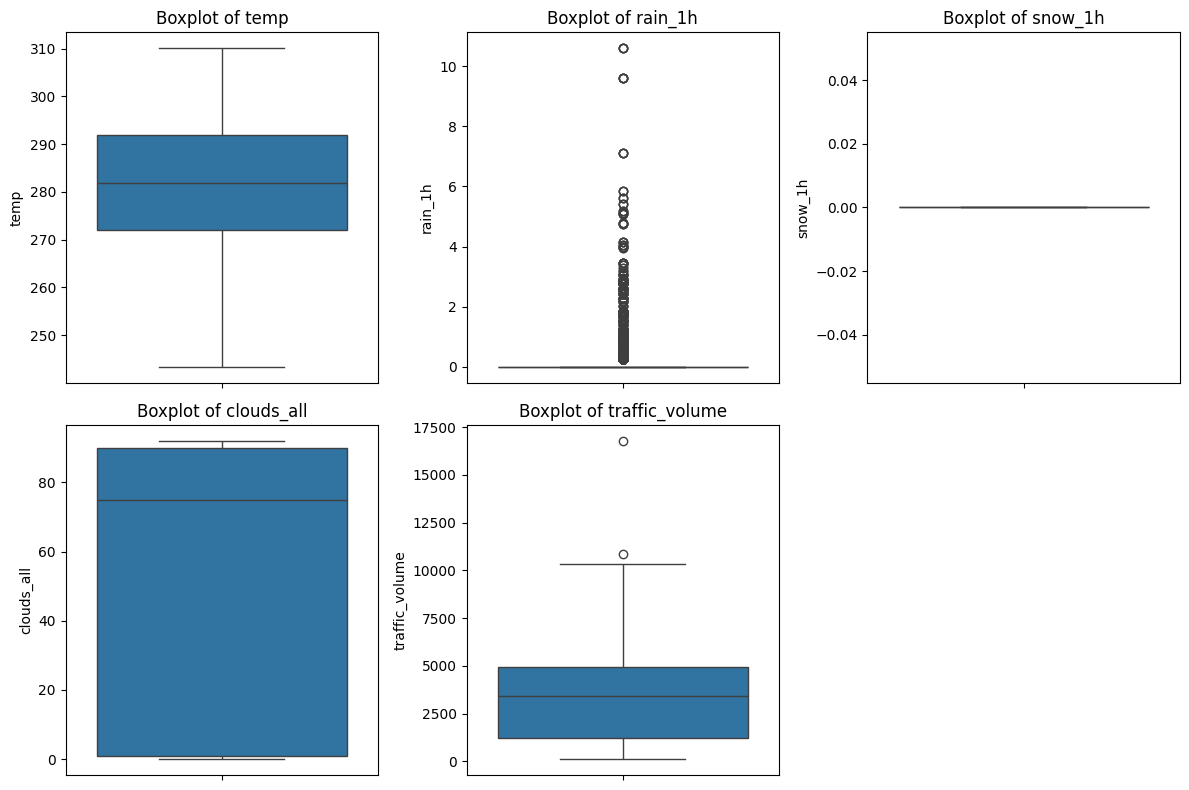

In [32]:
#Plot boxplots plots to identify any outliers or anomalies in the data

df = pd.read_csv('/content/Traffic Data.csv')


# Select numerical columns for boxplots
numerical_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Create boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


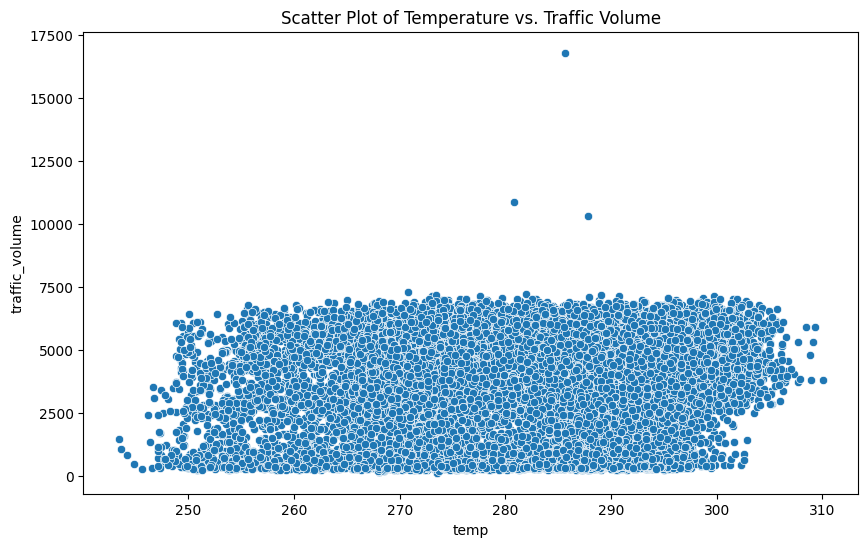

In [33]:
# Create scatter plots for potential relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='traffic_volume', data=df)
plt.title('Scatter Plot of Temperature vs. Traffic Volume')
plt.show()


In [141]:
import matplotlib.pyplot as plt
# Perform seasonal decomposition
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)  # Assuming daily seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.observed, label='Observed')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [60]:
# Sort the DataFrame by the 'date_time' index
df.sort_index(inplace=True)

In [54]:

# Create lag features
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)
df['traffic_volume_lag3'] = df['traffic_volume'].shift(3)

# Create moving average features
df['traffic_volume_ma7'] = df['traffic_volume'].rolling(window=7).mean()
df['traffic_volume_ma30'] = df['traffic_volume'].rolling(window=30).mean()

# Handle NaN values introduced by lags and moving averages
df.dropna(inplace=True)


In [62]:
# Resample to daily frequency and sum the traffic volume
df_daily = df.resample('D').sum()

In [57]:
# Check for missing values
print(df.isnull().sum())

traffic_volume         0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume_lag1    0
traffic_volume_lag2    0
traffic_volume_lag3    0
traffic_volume_ma7     0
traffic_volume_ma30    0
dtype: int64


In [59]:
# Fill missing values
df.fillna(method='ffill', inplace=True)

<ipython-input-59-7650748cf665>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [69]:
# Shift 'traffic_volume' by one day to get previous day's traffic volume
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)

In [71]:
# Calculate the difference between consecutive traffic volume values
df['traffic_volume_diff'] = df['traffic_volume'].diff()
print(df.head())

                     traffic_volume    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                   
2016-11-19 09:00:00          3500.0  270.90      0.0      0.0          90   
2016-11-19 10:00:00          3831.0  271.15      0.0      0.0           1   
2016-11-19 11:00:00          4285.0  271.21      0.0      0.0          90   
2016-11-19 12:00:00          4389.0  271.48      0.0      0.0           1   
2016-11-19 13:00:00          4332.0  271.62      0.0      0.0          75   

                    weather_main weather_description  traffic_volume_lag1  \
date_time                                                                   
2016-11-19 09:00:00         Snow          light snow               3112.0   
2016-11-19 10:00:00         Snow          light snow               3500.0   
2016-11-19 11:00:00         Snow          light snow               3831.0   
2016-11-19 12:00:00        Clear        sky is clear               4285.0  

In [76]:
# Extract date features
# Day of the week: To capture weekly seasonality.
df['day_of_week'] = df['date_time'].dt.dayofweek

# Month: To capture monthly trends.
df['month'] = df['date_time'].dt.month

# Day of the year: Useful for modeling yearly seasonality.
df['day_of_year'] = df['date_time'].dt.dayofyear


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [77]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [79]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

# Fit the scaler on training data
train_data_scaled = scaler.fit_transform(train_data[numeric_columns])
test_data_scaled = scaler.transform(test_data[numeric_columns])

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [89]:
from keras.layers import GRU

# Reshape data for RNN/GRU input (samples, timesteps, features)
X_train_rnn = train_data_scaled.reshape(train_data_scaled.shape[0], 1, train_data_scaled.shape[1])
X_test_rnn = test_data_scaled.reshape(test_data_scaled.shape[0], 1, test_data_scaled.shape[1])
# GRU Model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

In [90]:
from keras.layers import SimpleRNN

# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [92]:
# Fit GRU model
gru_history = gru_model.fit(X_train_rnn, train_data['traffic_volume'], epochs=20, batch_size=32,
                            validation_data=(X_test_rnn, test_data['traffic_volume']), verbose=1)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: nan - val_loss: nan
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: nan - val_loss: nan
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan - val_loss: nan
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [93]:
# predictions
gru_predictions = gru_model.predict(X_test_rnn)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Check if both arrays have data after NaN removal
if len(test_data_clean['traffic_volume']) == 0 or len(gru_predictions_clean) == 0:
    print("Error: Empty arrays after data cleaning.")
else:
    # Ensure both arrays have the same number of samples
    min_samples = min(len(test_data_clean['traffic_volume']), len([gru_predictions_clean]))
    test_data_aligned = test_data_clean['traffic_volume'][:min_samples]
    gru_predictions_aligned = gru_predictions_clean[:min_samples]

    # Calculate RMSE
    gru_rmse = np.sqrt(mean_squared_error(test_data_aligned, gru_predictions_aligned))

    # Calculate MAE
    gru_mae = mean_absolute_error(test_data_aligned, gru_predictions_aligned)

    print('GRU RMSE:', gru_rmse)
    print('GRU MAE:', gru_mae)

Error: Empty arrays after data cleaning.


In [138]:
# predictions
gru_predictions = gru_model.predict(X_test_rnn)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-137-69fbc662b4ce>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-137-69fbc662b4ce>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-137-69fbc662b4ce>:5: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



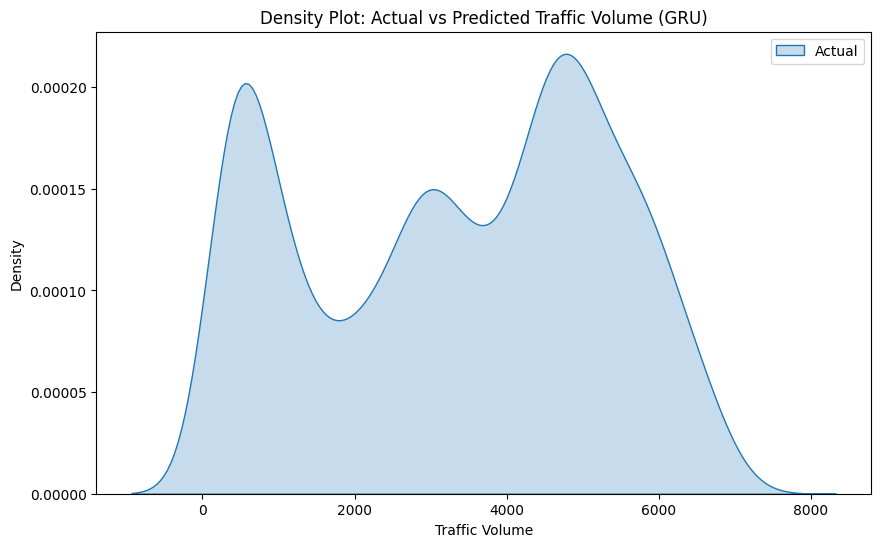

In [137]:
import matplotlib.pyplot as plt
# GRU Predictions
plt.figure(figsize=(10, 6))
sns.kdeplot(test_data['traffic_volume'], label='Actual', shade=True)
sns.kdeplot(gru_predictions.flatten(), label='Predicted (GRU)', shade=True)
plt.title('Density Plot: Actual vs Predicted Traffic Volume (GRU)')
plt.xlabel('Traffic Volume')
plt.ylabel('Density')
plt.legend()
plt.show()

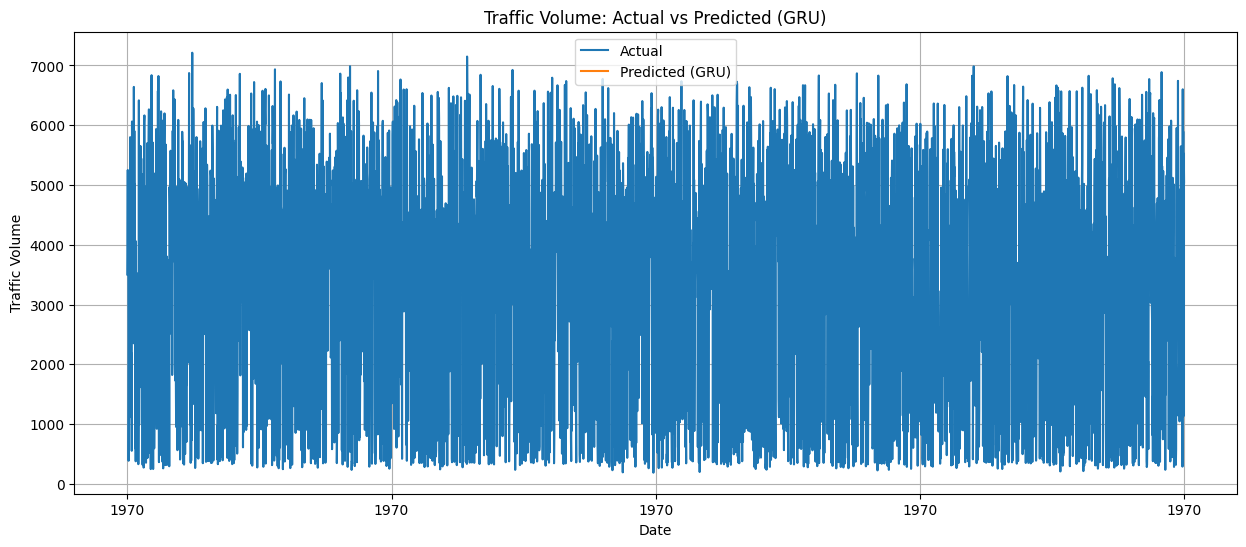

In [104]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['traffic_volume'], label='Actual')
plt.plot(test_data.index, gru_predictions, label='Predicted (GRU)')
plt.title('Traffic Volume: Actual vs Predicted (GRU)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

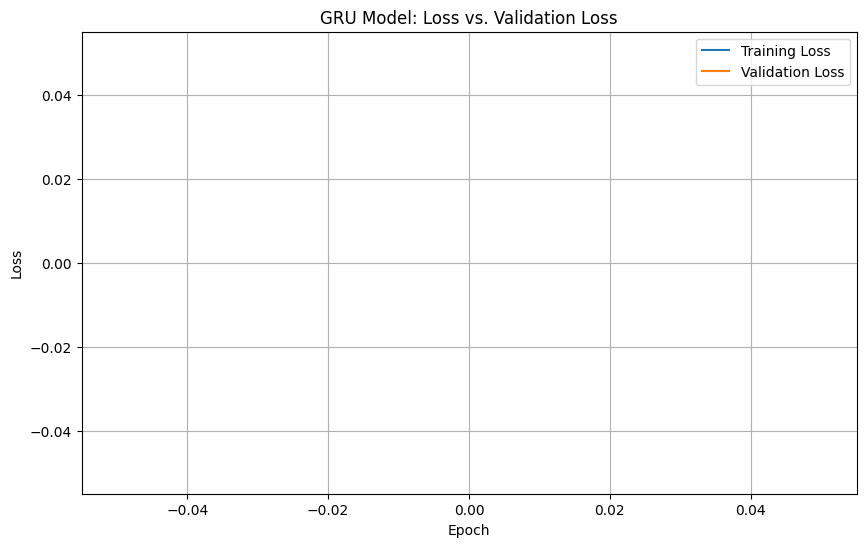

In [105]:
import matplotlib.pyplot as plt
# Plot loss and validation loss

plt.figure(figsize=(10, 6))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model: Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [107]:
# Fit RNN model
rnn_history = rnn_model.fit(X_train_rnn, train_data['traffic_volume'], epochs=20, batch_size=32,
                           validation_data=(X_test_rnn, test_data['traffic_volume']), verbose=1)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - val_loss: nan
Epoch 13/20
500/500 ━━━━━━━━━━━━━━━━━

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [108]:
# predictions
rnn_predictions = rnn_model.predict(X_test_rnn)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [138]:
import numpy as np

# Calculate RMSE
rnn_rmse = np.sqrt(mean_squared_error(test_data['traffic_volume'], rnn_predictions))

# Calculate MAE
rnn_mae = mean_absolute_error(test_data['traffic_volume'], rnn_predictions)

print('RNN RMSE:', rnn_rmse)
print('RNN MAE:', rnn_mae)


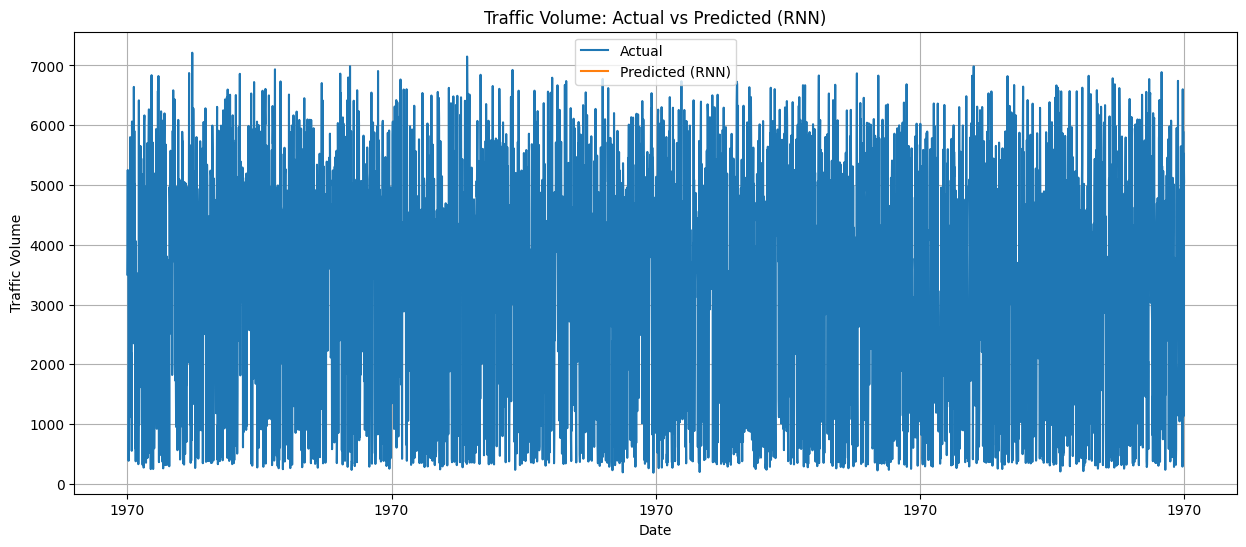

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.lineplot(x=test_data.index, y=test_data['traffic_volume'], label='Actual')
sns.lineplot(x=test_data.index, y=rnn_predictions[:, 0], label='Predicted (RNN)')
plt.title('Traffic Volume: Actual vs Predicted (RNN)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-139-9cc0c4c51d9b>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-139-9cc0c4c51d9b>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-139-9cc0c4c51d9b>:7: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



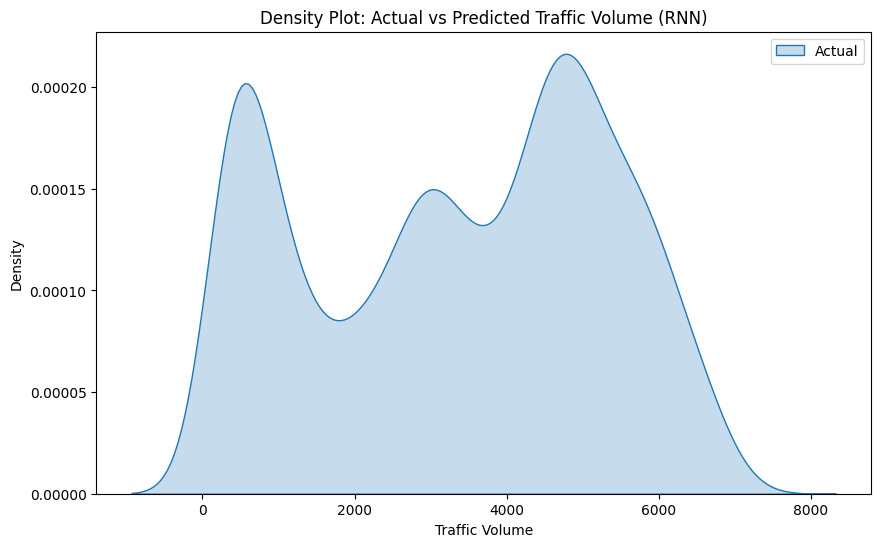

In [139]:
import matplotlib.pyplot as plt
# RNN Predictions
plt.figure(figsize=(10, 6))
sns.kdeplot(test_data['traffic_volume'], label='Actual', shade=True)
sns.kdeplot(rnn_predictions.flatten(), label='Predicted (RNN)', shade=True)
plt.title('Density Plot: Actual vs Predicted Traffic Volume (RNN)')
plt.xlabel('Traffic Volume')
plt.ylabel('Density')
plt.legend()
plt.show()

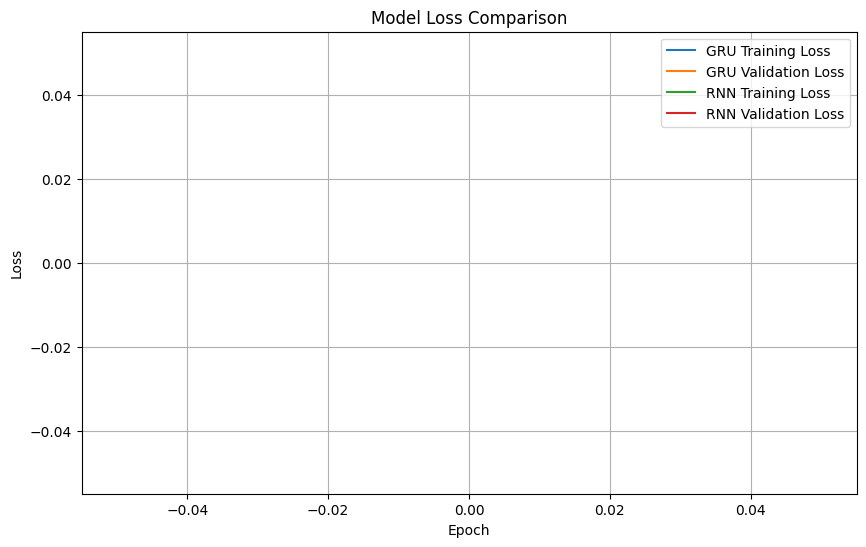

In [132]:
import matplotlib.pyplot as plt
# Plot loss and validation loss for GRU
plt.figure(figsize=(10, 6))
plt.plot(gru_history.history['loss'], label='GRU Training Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Validation Loss')

# Plot loss and validation loss for RNN
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')

plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Q1/ Data preprocessing was simple There was not a lot of missing data I used fillna to handle it i did Resample to daily frequency and sum the traffic volume

Q2/ yes,

Q3/

Q4/ it's the best for this dataset

Q5/ MAE provides a good indication of the average magnitude of errors in the predictions,
RMSE provides a measure of the spread of errors and is useful for understanding the overall model performance